# Install Library

In [1]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 13.6 MB/s eta 0:00:00


In [2]:
!pip install wordcloud

In [3]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Import Library

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import re
import string
import requests
import csv

from io import StringIO
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download as nltk_download
nltk_download('punkt')
nltk_download('stopwords')
nltk_download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, Dense, GRU
from tensorflow.keras.layers import Dropout, SpatialDropout1D, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Bidirectional, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.regularizers import l2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Dataset

In [5]:
df = pd.read_csv('getcontact.csv') #Membaca data

In [6]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7bdeace4-d21c-43bb-9f3b-9edb15e62888,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Fitur channel malah seperti ""sex group chat"". ...",1,835,7.3.0,2024-11-18 01:54:11,NaN,NaN,7.3.0
1,6060f0ae-3da0-419e-9064-718b866f1279,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Fitur lihat tag kenapa harus dijadikan premium...,2,290,7.2.2,2024-11-12 02:59:52,"Hai,\nKami telah menerima umpan balik Anda dan...",2024-11-12 08:59:34,7.2.2
2,e4a38135-7036-4c89-b35a-194ebd59497e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Gak bisa lihat tag orang lagi lantaran berbaya...,1,5625,7.1.1,2024-09-28 01:12:26,Tim Getcontact mengucapkan terima kasih atas k...,2024-09-29 10:58:05,7.1.1
3,3c4b8989-2279-4a5b-8615-072c352389df,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gak bisa liat tagar kontak, harus premium, pad...",1,1257,7.2.1,2024-10-13 23:14:04,Tim Getcontact telah menerima komentar Anda da...,2024-10-14 06:56:35,7.2.1
4,3ec7d54d-fc99-4fda-a4b8-44e3f53995aa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"udah premium lama. pas buka, aplikasi tiba tib...",1,816,7.2.1,2024-10-18 13:47:34,"Halo, Silahkan lengkapi formulir berikut dan s...",2024-10-18 19:02:04,7.2.1
...,...,...,...,...,...,...,...,...,...,...,...
14995,09842a2a-1baf-4d26-ab9a-032af1957057,Ali Udin,https://play-lh.googleusercontent.com/a-/ALV-U...,"Lama ga pake apk, coba trial, trus diuninstall...",1,0,NaN,2023-02-01 10:27:39,"Halo, Terima kasih telah menghubungi kami. Kam...",2023-02-01 15:12:03,NaN
14996,ab466681-c2fa-4bda-9611-e474d402acb8,Miya F,https://play-lh.googleusercontent.com/a-/ALV-U...,Iseng2 q download ini aplikasi.. ya Allah... S...,1,0,NaN,2021-12-18 15:29:35,Silahkan lengkapi formulir berikut dan salah s...,2021-12-18 22:02:19,NaN
14997,b91db9e9-0176-4df2-be03-744d729a1f07,Citra Kusuma W,https://play-lh.googleusercontent.com/a/ACg8oc...,Tak bisa veryfikasi walaupun udh ganti email. ...,1,1,5.6.2,2021-12-27 08:54:22,"Halo, Citra. Silahkan lengkapi formulir beriku...",2021-12-27 09:26:01,5.6.2
14998,32c11e8c-b405-4d36-b3da-e4a03b62aede,B.F.F.K12,https://play-lh.googleusercontent.com/a-/ALV-U...,Kok saya pas memverifikasi panggilan kok gagal...,4,3,5.6.2,2021-12-06 15:32:04,Silahkan lengkapi formulir berikut dan salah s...,2021-12-07 13:33:40,5.6.2


In [7]:
df.info() #Melihat informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              15000 non-null  object
 1   userName              15000 non-null  object
 2   userImage             15000 non-null  object
 3   content               15000 non-null  object
 4   score                 15000 non-null  int64 
 5   thumbsUpCount         15000 non-null  int64 
 6   reviewCreatedVersion  11993 non-null  object
 7   at                    15000 non-null  object
 8   replyContent          9769 non-null   object
 9   repliedAt             9769 non-null   object
 10  appVersion            11993 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


# Data Preparation

In [8]:
# Hapus apabila terdapat missing value pada kolom 'content'
data_clean = df.dropna(subset=['content'])

# Hapus apabila terdapat data duplikat
data_clean = data_clean.drop_duplicates()

In [9]:
# Cek data
data_clean.info() #Tidak ada data duplikat dan missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              15000 non-null  object
 1   userName              15000 non-null  object
 2   userImage             15000 non-null  object
 3   content               15000 non-null  object
 4   score                 15000 non-null  int64 
 5   thumbsUpCount         15000 non-null  int64 
 6   reviewCreatedVersion  11993 non-null  object
 7   at                    15000 non-null  object
 8   replyContent          9769 non-null   object
 9   repliedAt             9769 non-null   object
 10  appVersion            11993 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


# Data Pre-Processing

In [10]:
# Menghapus simbol @ #, RT, link http, dan nomor dari text. (CLEANING TEXT)

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove @
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove #
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove no 0-9
    text = re.sub(r'[^\w\s]', '', text) # remove ^
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

In [11]:
# Ubah menjadi huruf kecil semua (CASEFOLDING)

def casefoldingText(text):
    text = text.lower()
    return text

In [12]:
# Memisahkan kata (TOKENIZING)

def tokenizingText(text):
    text = word_tokenize(text)
    return text

In [13]:
# Menghapus Kata (FILTERING TEXT)

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    #Stopwords tambahan
    listStopwords.update(['yaa','gak','gamau',"gk","ga",'yeuh',
                          'na','sih','ku',"di","ya","y","loh","kah",
                          "woi","woy","woe","hmmm"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

In [14]:
# Ubah ke kata dasar (STEMMING)

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

In [15]:
# Menggabungkan kembali daftar kata-kata (list of words) menjadi satu kalimat

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [16]:
# Slangwords biar kebaca bahasa gaul ceunah, replace ke kata baku

slangwords = {
    "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "@": "di",
    "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar",
    "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia",
    "bgtt": "banget", "ad": "ada", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know",
    "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku",
    "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing",
    "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku",
    "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu",
    "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang",
    "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "basbang": "basi",
    "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci",
    "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget",
    "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan",
    "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar",
    "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat",
    "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan",
    "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa",
    "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum",
    "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa",
    "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih",
    "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf",
    "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun",
    "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh",
    "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan",
    "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan",
    "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya",
    "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya",
    "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back",
    "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi",
    "gaptek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi",
    "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh",
    "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok",
    "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya",
    "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka",
    "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu",
    "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak",
    "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat",
    "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan",
    "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah",
    "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian",
    "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin",
    "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita",
    "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara",
    "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat",
    "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa",
    "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam",
    "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu",
    "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol",
    "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah",
    "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak",
    "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ",
    "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak",
    "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali",
    "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah","togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"
    }

In [17]:
# Mengubah slangwords menjadi bentuk baku
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [18]:
# Buat dataframe baru untuk dibandingkan dengan data asli
df_pre = data_clean

In [19]:
# Menambahkan hasil data pre-processing ke df_pre

df_pre ['text_clean'] = df_pre ['content'].apply(cleaningText)
df_pre['text_casefoldingText'] = df_pre['text_clean'].apply(casefoldingText)
df_pre['text_slangwords'] = df_pre['text_casefoldingText'].apply(fix_slangwords)
df_pre['text_tokenizingText'] = df_pre['text_slangwords'].apply(tokenizingText)
df_pre['text_stopword'] = df_pre['text_tokenizingText'].apply(filteringText)
df_pre['text_akhir'] = df_pre['text_stopword'].apply(toSentence)

df_pre.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,7bdeace4-d21c-43bb-9f3b-9edb15e62888,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Fitur channel malah seperti ""sex group chat"". ...",1,835,7.3.0,2024-11-18 01:54:11,NaN,NaN,7.3.0,Fitur channel malah seperti sex group chat Ben...,fitur channel malah seperti sex group chat ben...,fitur channel bahkan seperti sex group chat be...,"[fitur, channel, bahkan, seperti, sex, group, ...","[fitur, channel, sex, group, chat, benarbenar,...",fitur channel sex group chat benarbenar sesuai...
1,6060f0ae-3da0-419e-9064-718b866f1279,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Fitur lihat tag kenapa harus dijadikan premium...,2,290,7.2.2,2024-11-12 02:59:52,"Hai,\nKami telah menerima umpan balik Anda dan...",2024-11-12 08:59:34,7.2.2,Fitur lihat tag kenapa harus dijadikan premium...,fitur lihat tag kenapa harus dijadikan premium...,fitur lihat tag kenapa harus dijadikan premium...,"[fitur, lihat, tag, kenapa, harus, dijadikan, ...","[fitur, lihat, tag, dijadikan, premium, dijadi...",fitur lihat tag dijadikan premium dijadiin pre...
2,e4a38135-7036-4c89-b35a-194ebd59497e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Gak bisa lihat tag orang lagi lantaran berbaya...,1,5625,7.1.1,2024-09-28 01:12:26,Tim Getcontact mengucapkan terima kasih atas k...,2024-09-29 10:58:05,7.1.1,Gak bisa lihat tag orang lagi lantaran berbaya...,gak bisa lihat tag orang lagi lantaran berbaya...,gak bisa lihat tag orang lagi lantaran berbaya...,"[gak, bisa, lihat, tag, orang, lagi, lantaran,...","[lihat, tag, orang, lantaran, berbayar, kembal...",lihat tag orang lantaran berbayar kembalikan g...


## Lexicon Sentimen based Text analysis

In [20]:
# Membaca data kamus kata-kata negatif dari lexicon data dari GitHub

lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    lexicon_negative[row[0]] = int(row[1])

In [21]:
# Membaca data kamus kata-kata Positif dari lexicon data dari GitHub

lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    lexicon_positive[row[0]] = int(row[1])

## Polaritas Sentimen dan Labelling 3 Klasifikasi Sentimen

In [22]:
# Polaritas Sentimen dari kamus lexicon yang telah di definisikan

def analisis_sentimen(text):
    score = 0
     # LOOP setiap kata dalam teks
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word] #Skor positif

    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word] #Skor negatif

    polarity=''

    if (score >= 0):
        polarity = 'positive'
    elif (score <= -5):
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [23]:
# Memberi label pada text
results = df_pre['text_stopword'].apply(analisis_sentimen)
results = list(zip(*results))
df_pre['polarity_score'] = results[0]
df_pre['polarity'] = results[1]
print(df_pre['polarity'].value_counts())

polarity
positive    5966
negative    5212
neutral     3822
Name: count, dtype: int64


# Diagram dan Wordcloud

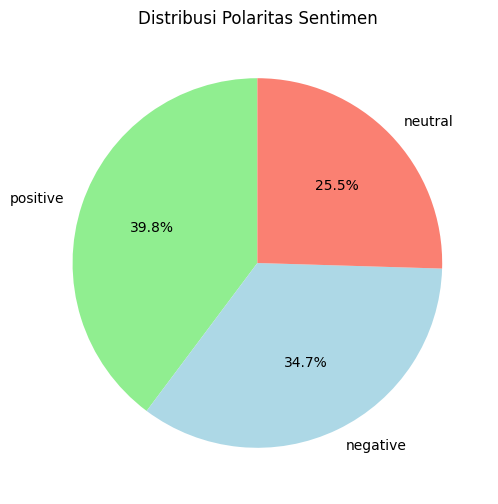

In [24]:
# Menghitung jumlah setiap kategori polaritas
polarity_counts = df_pre['polarity'].value_counts()

# Membuat diagram pie
plt.figure(figsize=(6,6))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightblue', 'salmon'])

# Menambahkan judul
plt.title('Distribusi Polaritas Sentimen')

# Menampilkan diagram pie
plt.show()

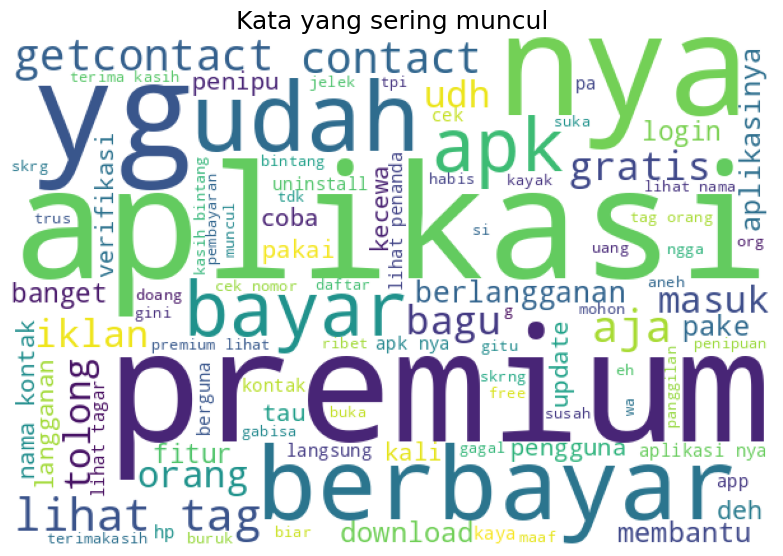

In [25]:
# Lihat kata-kata yang sering muncul secara umum

list_words = ''

for umum in df_pre['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in umum:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Kata yang sering muncul', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

## TF-IDF Fitur Extraction

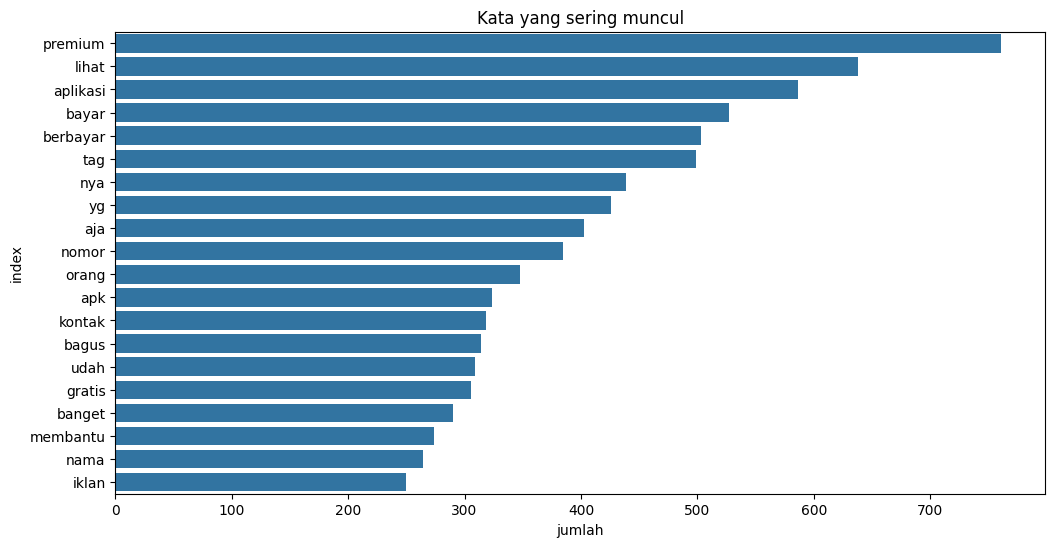

In [26]:
# Kata yang sering muncul di Review Get Contact

plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_pre['text_akhir'])

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)

sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Kata yang sering muncul')
plt.show()

#Modelling Deep Learning

In [27]:
# FITUR (X) DAN TARGET (y) MODEL

X = df_pre['text_akhir']
y = df_pre['polarity']

In [28]:
# Tokenisasi Data

max_features = 2500
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)

In [29]:
# Categorical >> Numerik (Label encoding)
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(y)
y = to_categorical(integer_encoded)

In [30]:
# Jumlah kelas
num_classes = y.shape[1]

## EXPERIMENT 1: LSTM

In [123]:
# Algoritma Pelatihan: LSTM
# Pembagian Data: Training 70, val 20, test 10

X_train_val, X_test_LSTM, y_train_val, y_test_LSTM = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_LSTM, X_val_LSTM, y_train_LSTM, y_val_LSTM = train_test_split(X_train_val, y_train_val, test_size=2/9, random_state=42)

In [124]:
# Model Deeplearning LSTM

model_LSTM = Sequential()
model_LSTM.add(Embedding(max_features, 256, input_length=X.shape[1]))

model_LSTM.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01), return_sequences=True))
model_LSTM.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))

model_LSTM.add(Dense(128, activation='relu'))
model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(Dense(num_classes, activation='softmax'))

model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [125]:
!pip install tensorflow

import tensorflow as tf

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Latih model dengan callbacks dengan pemanggilan early stopping
epochs=50
batch_size = 2056
history_LSTM = model_LSTM.fit(X_train_LSTM, y_train_LSTM,
                              epochs=epochs, batch_size=batch_size,
                              verbose=2, callbacks=[early_stopping],
                              validation_data=(X_val_LSTM, y_val_LSTM))

Epoch 1/50
5/5 - 7s - 1s/step - accuracy: 0.4183 - loss: 5.9103 - val_accuracy: 0.4976 - val_loss: 5.4133
Epoch 2/50
5/5 - 2s - 406ms/step - accuracy: 0.4803 - loss: 5.1712 - val_accuracy: 0.5077 - val_loss: 4.7198
Epoch 3/50
5/5 - 4s - 721ms/step - accuracy: 0.4992 - loss: 4.5088 - val_accuracy: 0.5167 - val_loss: 4.1215
Epoch 4/50
5/5 - 1s - 277ms/step - accuracy: 0.5157 - loss: 3.9363 - val_accuracy: 0.5572 - val_loss: 3.5875
Epoch 5/50
5/5 - 2s - 500ms/step - accuracy: 0.5632 - loss: 3.4079 - val_accuracy: 0.6078 - val_loss: 3.0778
Epoch 6/50
5/5 - 1s - 249ms/step - accuracy: 0.6201 - loss: 2.9197 - val_accuracy: 0.6565 - val_loss: 2.6286
Epoch 7/50
5/5 - 1s - 255ms/step - accuracy: 0.6481 - loss: 2.5082 - val_accuracy: 0.7083 - val_loss: 2.2865
Epoch 8/50
5/5 - 3s - 504ms/step - accuracy: 0.6972 - loss: 2.1590 - val_accuracy: 0.7319 - val_loss: 1.9819
Epoch 9/50
5/5 - 5s - 947ms/step - accuracy: 0.7372 - loss: 1.8492 - val_accuracy: 0.7450 - val_loss: 1.7224
Epoch 10/50
5/5 - 3s -

In [149]:
# Evaluasi Model LSTM

loss_LSTM, acc_LSTM = model_LSTM.evaluate(X_test_LSTM, y_test_LSTM, verbose=2)
# Access the accuracy, which is the second element of the list
print("Test accuracy: %.2f" % (acc_LSTM))

94/94 - 7s - 71ms/step - accuracy: 0.8660 - loss: 0.5401
Test accuracy: 0.87


## EXPERIMENT 2 : GRU  with training 90, val 5, test 5

In [140]:
# Algoritma Pelatihan: GRU
# Pembagian Data: Training 90, val 5, test 5

X_train_val, X_test_GRU, y_train_val, y_test_GRU = train_test_split(X, y, test_size=0.05, random_state=42)
X_train_GRU, X_val_GRU, y_train_GRU, y_val_GRU = train_test_split(X_train_val, y_train_val, test_size=0.0526, random_state=42)

In [141]:
# Model Deeplearning GRU

def build_model():
    model = Sequential()
    model.add(Embedding(max_features, 256, input_length=X.shape[1]))  # embedding_dim = 256
    model.add(SpatialDropout1D(0.3))

    model.add(Bidirectional(GRU(128, return_sequences=True, kernel_regularizer=l2(0.01))))  # units = 128
    model.add(Bidirectional(GRU(128, return_sequences=True, kernel_regularizer=l2(0.01))))
    model.add(Bidirectional(GRU(128, return_sequences=False, kernel_regularizer=l2(0.01))))

    model.add(Dense(192, activation='relu', kernel_regularizer=l2(0.01)))  # dense_units = 192
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.00011284),  # learning_rate = 0.00011284
                  metrics=['accuracy'])
    return model

In [142]:
#Custom callback apabila sudah 0.92 maka berhenti

# Custom callback apabila val_accuracy sudah melebihi 0.92
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= 0.85:
            print(f"\nVal accuracy telah melebihi 0.85, Bagus! {epoch+1}")
            self.model.stop_training = True


early_stopping = CustomCallback()

In [143]:
# Latih model dengan callbacks dengan pemanggilan early stopping

model = build_model()
history_GRU = model.fit(X_train_GRU, y_train_GRU,
                        epochs=50, validation_data=(X_val_GRU, y_val_GRU),
                        callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.4236 - loss: 17.2668 - val_accuracy: 0.6587 - val_loss: 5.8406
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.7045 - loss: 4.3560 - val_accuracy: 0.8000 - val_loss: 1.7449
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.8148 - loss: 1.4113 - val_accuracy: 0.8413 - val_loss: 0.8845
Epoch 4/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8554 - loss: 0.7699
Val accuracy telah melebihi 0.85, Bagus! 4
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.8554 - loss: 0.7697 - val_accuracy: 0.8520 - val_loss: 0.6634


In [145]:
# Evaluasi Model GRU

loss_GRU, acc_GRU = model.evaluate(X_test_GRU, y_test_GRU, verbose=2)
print("Test accuracy: %.2f" % (acc_GRU))

24/24 - 1s - 29ms/step - accuracy: 0.8587 - loss: 0.6263
Test accuracy: 0.86


## EXPERIMENT 3 : GRU  with training 80, val 10, test 10

In [128]:
# Algoritma Pelatihan: GRU

X_train_val, X_test_GRU, y_train_val, y_test_GRU = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_GRU, X_val_GRU, y_train_GRU, y_val_GRU = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

In [129]:
# Model Deeplearning GRU

def build_model():
    model = Sequential()
    model.add(Embedding(max_features, 256, input_length=X.shape[1]))  # embedding_dim = 256
    model.add(SpatialDropout1D(0.3))

    model.add(Bidirectional(GRU(128, return_sequences=True, kernel_regularizer=l2(0.01))))  # units = 128
    model.add(Bidirectional(GRU(128, return_sequences=True, kernel_regularizer=l2(0.01))))
    model.add(Bidirectional(GRU(128, return_sequences=False, kernel_regularizer=l2(0.01))))

    model.add(Dense(192, activation='relu', kernel_regularizer=l2(0.01)))  # dense_units = 192
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.00011284),  # learning_rate = 0.00011284
                  metrics=['accuracy'])
    return model

In [130]:
#Custom callback apabila sudah 0.92 maka berhenti

# Custom callback apabila val_accuracy sudah melebihi 0.92
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= 0.85:
            print(f"\nVal accuracy telah melebihi 0.85, Bagus! {epoch+1}")
            self.model.stop_training = True


early_stopping = CustomCallback()

In [131]:
# Latih model dengan callbacks dengan pemanggilan early stopping

model = build_model()
history_GRU2 = model.fit(X_train_GRU, y_train_GRU,
                        epochs=50, validation_data=(X_val_GRU, y_val_GRU),
                        callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


380/380 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.3962 - loss: 17.7006 - val_accuracy: 0.5074 - val_loss: 6.8275
Epoch 2/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.5721 - loss: 5.1887 - val_accuracy: 0.7593 - val_loss: 2.0303
Epoch 3/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.7809 - loss: 1.6443 - val_accuracy: 0.8148 - val_loss: 0.9306
Epoch 4/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8435 - loss: 0.8037 - val_accuracy: 0.8163 - val_loss: 0.6873
Epoch 5/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.8690 - loss: 0.5820 - val_accuracy: 0.7978 - val_loss: 0.6642
Epoch 6/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8815 - loss: 0.4843
Val accuracy telah melebihi 0.85, Bagus! 6
380/380 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8815 - loss: 0.4843 - val_accuracy: 0.8570 - val_loss: 0.5135


In [134]:
# Evaluasi Model GRU

loss_GRU2, acc_GRU2 = model.evaluate(X_test_GRU, y_test_GRU, verbose=2) # Unpack the list into loss and accuracy
print("Test accuracy: %.2f" % (acc_GRU2))

47/47 - 1s - 15ms/step - accuracy: 0.8593 - loss: 0.5084
Test accuracy: 0.86


## Evaluasi Model

Berikut 3 percobaan skema pelatihan yang telah dilakukan
- Pelatihan: LSTM,    Ekstraksi Fitur: TF-IDF,    Pembagian Data Training-Validation-Test: 70/20/10
- Pelatihan: GRU,    Ekstraksi Fitur: TF-IDF,    Pembagian Data Training-Validation-Test: 90/5/5
- Pelatihan: GRU,    Ekstraksi Fitur: TF-IDF,    Pembagian Data Training-Validation-Test: 80/10/10    

In [146]:
results_df = pd.DataFrame({
    'Model': ['LSTM','GRU','GRU2'],
    'Accuracy Train': [
        history_LSTM.history['accuracy'][-1],
        history_GRU.history['accuracy'][-1],
        history_GRU2.history['accuracy'][-1]
    ],
    'Accuracy Test': [acc_LSTM, acc_GRU, acc_GRU2]
})

results_df


,Model,Accuracy Train,Accuracy Test
0,LSTM,0.958963,0.866000
1,GRU,0.851111,0.858667
2,GRU2,0.885185,0.859333
